# LOAN PREDICTION CASE-STUDY

In [ ]:
#importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading the loan prediction dataset
loan_df=pd.read_csv("https://raw.githubusercontent.com/kajalpanda1/Practiceproject/master/Loan_prediction%20case%20study/Loan_Dataset.csv")

In [ ]:
#retrieving first five records of the set
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#shape of the dataset
loan_df.shape

(614, 13)

In [ ]:
#feature column names
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#datatypes of dataset features
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#dropping LaonId as it is of least importance 
loan_df=loan_df.drop(columns=('Loan_ID'))

In [ ]:
#checking for null values in the dataset
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#treating the missing values for categorical features
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0],inplace=True)

In [ ]:
#treating the missing values for numerical values
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean(),inplace=True)

In [ ]:
#again checking for null values
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#describing statistics of real-valued features
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
#sum of target column's distinct values
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#probability of yes no in loan_status feature
loan_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Exploratory Data Analysis

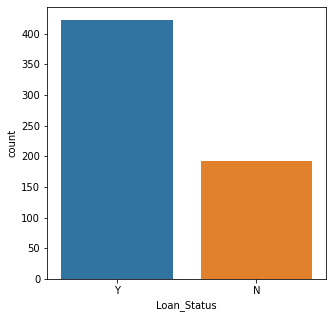

In [ ]:
#plotting loan_status
plt.figure(figsize=(5,5))
sns.countplot('Loan_Status',data=loan_df)

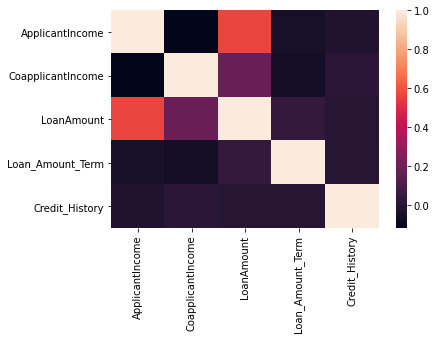

In [ ]:
#plotting heatmap-to check correlation among real-valued features
sns.heatmap(loan_df.corr())

UNIVARIATE ANALYSIS

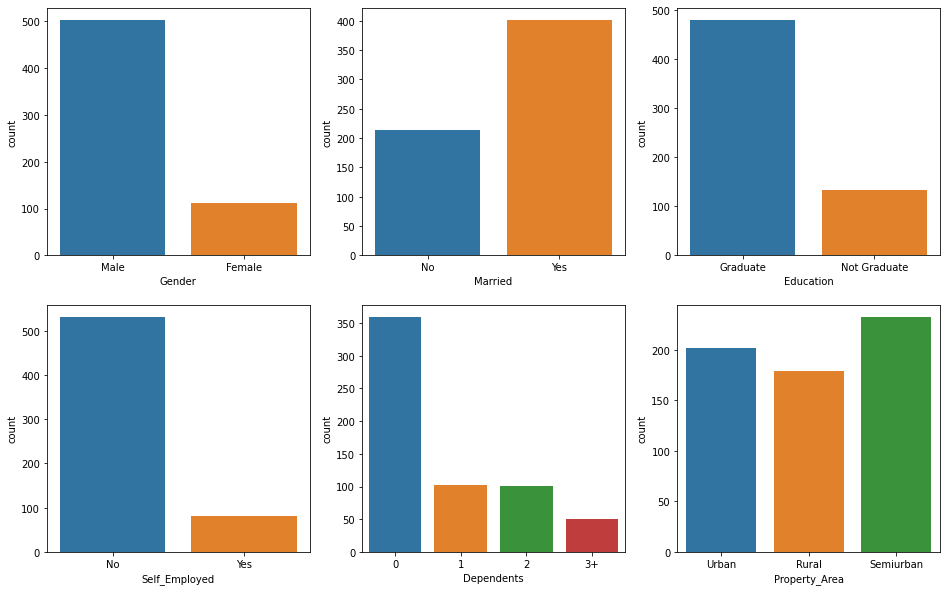

In [ ]:
#plotting categorical features
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot('Gender',data=loan_df)
plt.subplot(2,3,2)
sns.countplot('Married',data=loan_df)
plt.subplot(2,3,3)
sns.countplot('Education',data=loan_df)
plt.subplot(2,3,4)
sns.countplot('Self_Employed',data=loan_df)
plt.subplot(2,3,5)
sns.countplot('Dependents',data=loan_df)
plt.subplot(2,3,6)
sns.countplot('Property_Area',data=loan_df)

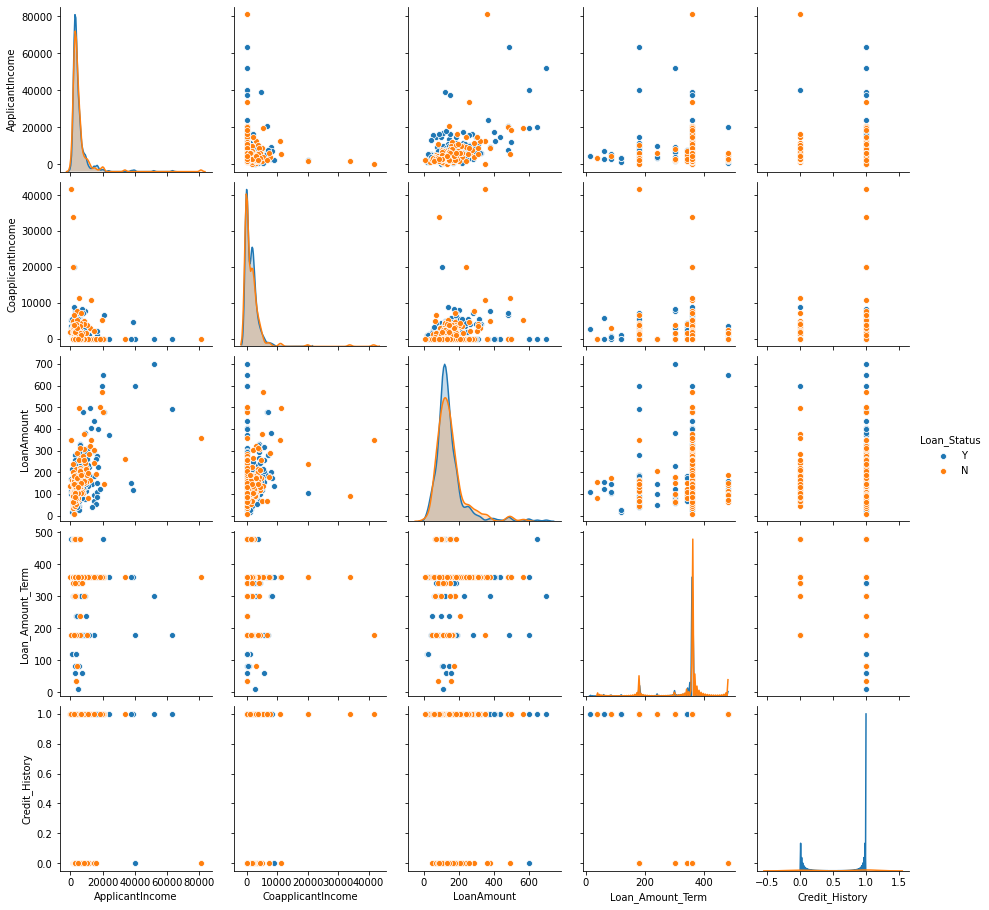

In [ ]:
#visualizing how all the features affects the loan status
sns.pairplot(loan_df,hue='Loan_Status')

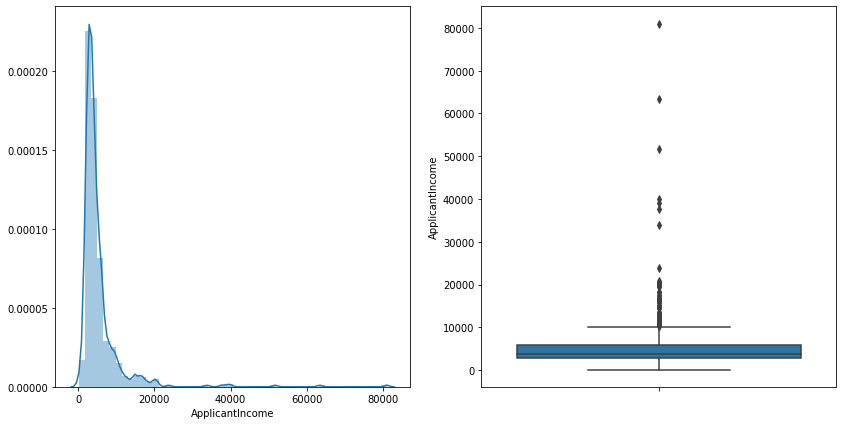

In [ ]:
#plotting for ApplicantIncome feature distribution and boxplot for statistical analysis
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.distplot(loan_df['ApplicantIncome']) 
plt.subplot(1,2,2)
sns.boxplot('ApplicantIncome',data=loan_df,orient='v')

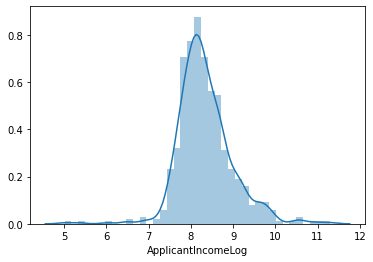

In [ ]:
#applying log transformation for ApplicantIncome feature to get normally distributed data
loan_df['ApplicantIncomeLog']=np.log(loan_df['ApplicantIncome'])
sns.distplot(loan_df['ApplicantIncomeLog'])

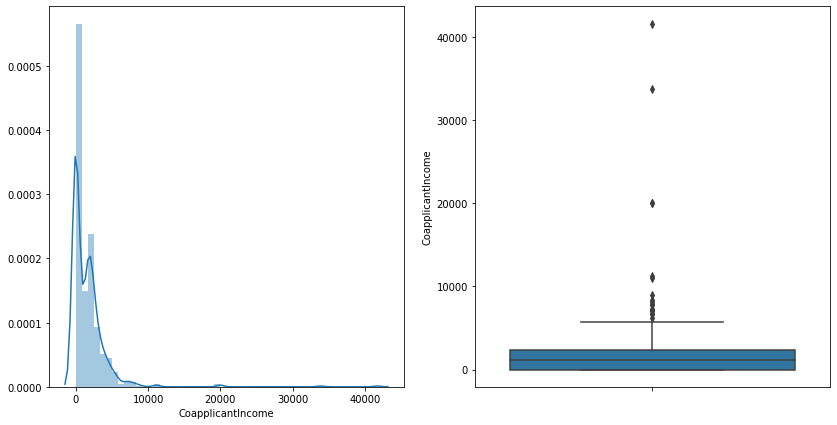

In [ ]:
#plotting for CoapplicantIncome feature distribution and boxplot for statistical analysis
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.distplot(loan_df['CoapplicantIncome']) 
plt.subplot(1,2,2)
sns.boxplot('CoapplicantIncome',data=loan_df,orient='v')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


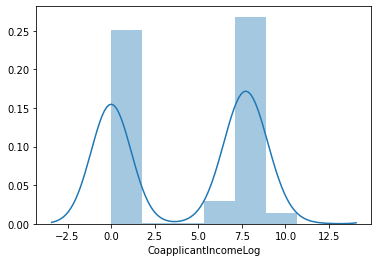

In [ ]:
#applying log transformation for CoapplicantIncome feature to get normally distributed data
loan_df['CoapplicantIncomeLog']=np.log(loan_df['CoapplicantIncome'])
loan_df['CoapplicantIncomeLog']=loan_df['CoapplicantIncomeLog'].replace(np.NINF,0.0)
sns.distplot(loan_df['CoapplicantIncomeLog'])

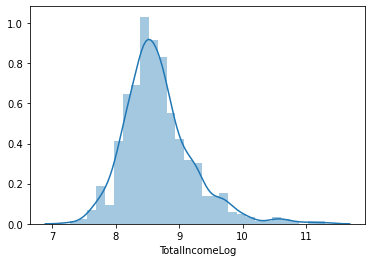

In [ ]:
#creating new attribute
loan_df['TotalIncome']=loan_df['ApplicantIncome']+loan_df['CoapplicantIncome']
#applying log transformation to TotalIncome
loan_df['TotalIncomeLog']=np.log(loan_df['TotalIncome'])
sns.distplot(loan_df['TotalIncomeLog'])

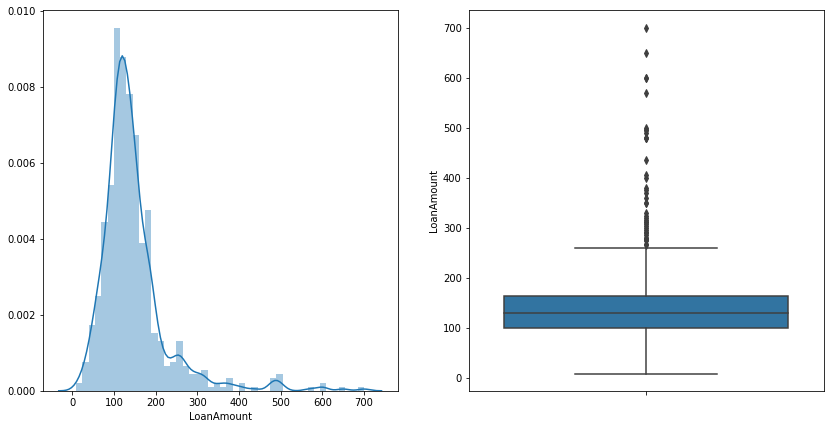

In [ ]:
#plotting for ApplicantIncome feature distribution and boxplot for statistical analysis
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.distplot(loan_df['LoanAmount']) 
plt.subplot(1,2,2)
sns.boxplot('LoanAmount',data=loan_df,orient='v')

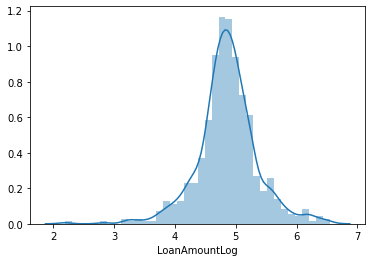

In [ ]:
#applying log transformation to LoanAmount feature
loan_df['LoanAmountLog']=np.log(loan_df['LoanAmount'])
sns.distplot(loan_df['LoanAmountLog'])

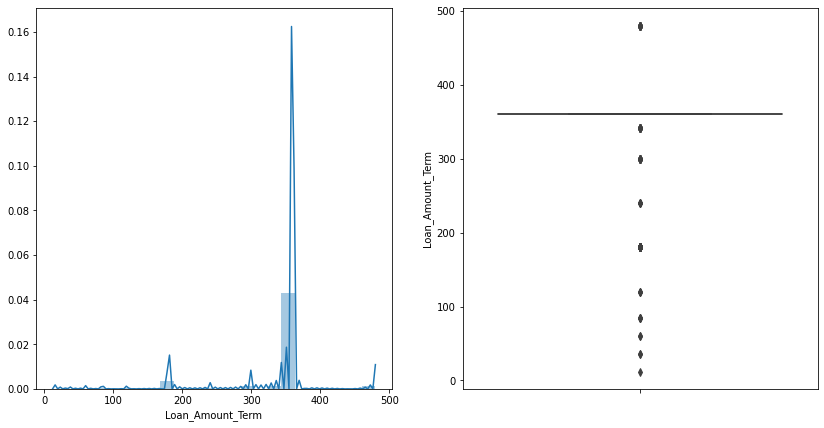

In [ ]:
#plotting for ApplicantIncome feature distribution and boxplot for statistical analysis
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.distplot(loan_df['Loan_Amount_Term']) 
plt.subplot(1,2,2)
sns.boxplot('Loan_Amount_Term',data=loan_df,orient='v')

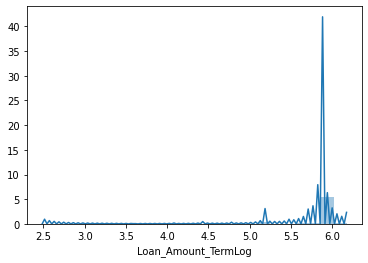

In [ ]:
#applying log transformation to LoanAmount feature
loan_df['Loan_Amount_TermLog']=np.log(loan_df['Loan_Amount_Term'])
sns.distplot(loan_df['Loan_Amount_TermLog'])

In [ ]:
#replacing 3+ dependent values to 3 for easy computation
loan_df['Dependents']=loan_df['Dependents'].replace('3+',3)

BIVARIATE ANALYSIS

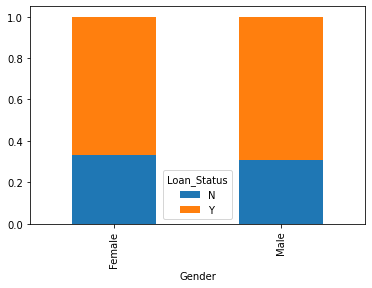

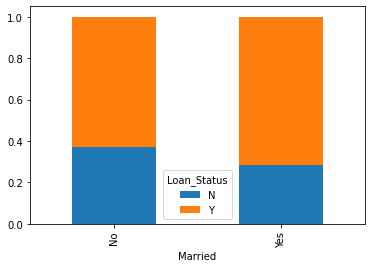

In [ ]:
Gender=pd.crosstab(loan_df['Gender'],loan_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
Married=pd.crosstab(loan_df['Married'],loan_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

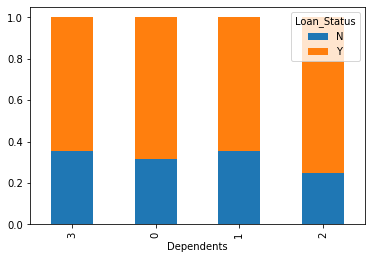

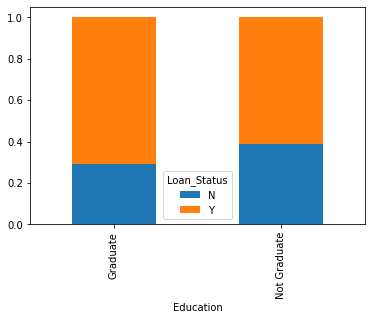

In [ ]:
Dependents=pd.crosstab(loan_df['Dependents'],loan_df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
Education=pd.crosstab(loan_df['Education'],loan_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

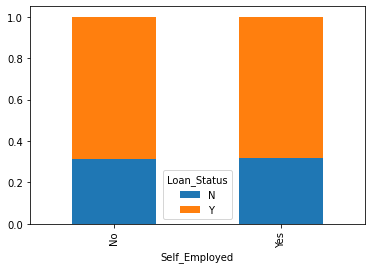

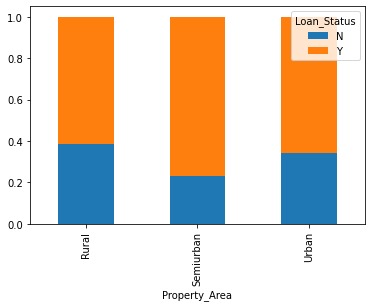

In [ ]:
Self_Employed=pd.crosstab(loan_df['Self_Employed'],loan_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
Property_Area=pd.crosstab(loan_df['Property_Area'],loan_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

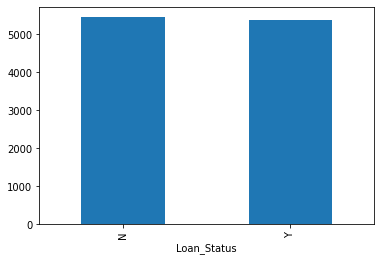

In [ ]:
loan_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

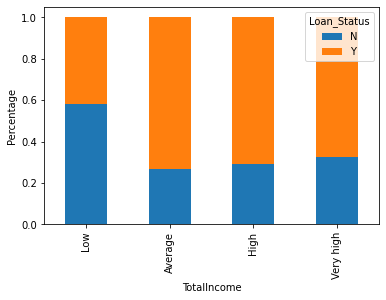

In [ ]:
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very high']
loan_df['TotalIncome_bin']=pd.cut(loan_df['TotalIncome'],bins,labels=groups)
Total_Income_bin=pd.crosstab(loan_df['TotalIncome_bin'],loan_df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('TotalIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

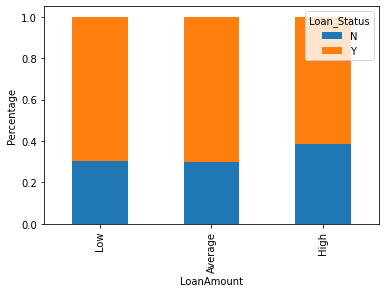

In [ ]:
bins=[0,100,200,700]
groups=['Low','Average','High']
loan_df['LoanAmount_bin']=pd.cut(loan_df['LoanAmount'],bins,labels=groups)
LoanAmount_bin=pd.crosstab(loan_df['LoanAmount_bin'],loan_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

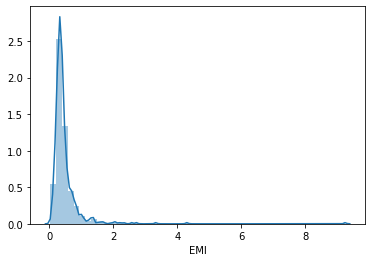

In [ ]:
#creating new feature EMI
loan_df['EMI']=loan_df['LoanAmount']/loan_df['Loan_Amount_Term']
sns.distplot(loan_df['EMI'])

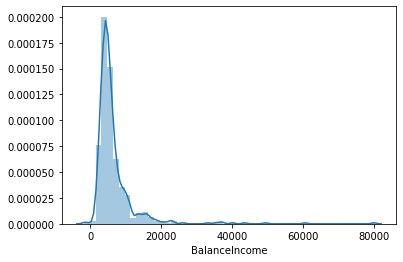

In [ ]:
#creating new feature BalanceIncome
loan_df['BalanceIncome']=loan_df['TotalIncome']-(loan_df['EMI']*1000)
sns.distplot(loan_df['BalanceIncome'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


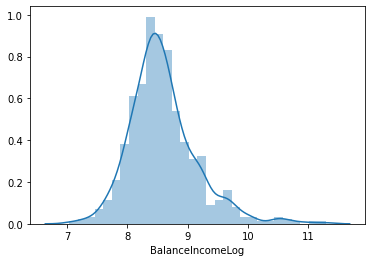

In [ ]:
#applying log transformation to BalanceIncome feature
loan_df['BalanceIncomeLog']=np.log(loan_df['BalanceIncome'])
sns.distplot(loan_df['BalanceIncomeLog'])

In [ ]:
#categorical values into numerical ones
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in cols:
  loan_df[i]=le.fit_transform(loan_df[i])

In [ ]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,TotalIncome,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncome_bin,LoanAmount_bin,EMI,BalanceIncome,BalanceIncomeLog
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674026,0.000000,5849.0,8.674026,4.986426,5.886104,High,Average,0.406700,5442.299550,8.601957
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.430109,7.318540,6091.0,8.714568,4.852030,5.886104,Very high,Average,0.355556,5735.444444,8.654421
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006368,0.000000,3000.0,8.006368,4.189655,5.886104,Average,Low,0.183333,2816.666667,7.943309
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,7.856707,7.765569,4941.0,8.505323,4.787492,5.886104,High,Average,0.333333,4607.666667,8.435477
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699515,0.000000,6000.0,8.699515,4.948760,5.886104,High,Average,0.391667,5608.333333,8.632009


In [ ]:
#dropping unnecessary columns
loan_df=loan_df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncomeLog','TotalIncome','LoanAmount_bin','BalanceIncome','EMI','BalanceIncomeLog',
                              'LoanAmount_bin','TotalIncome_bin'])

In [ ]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,8.430109,8.714568,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,7.856707,8.505323,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760,5.886104


# MODEL CREATION

In [ ]:
#extracting feature and target columns from the dataset
feature_df=loan_df.drop(columns=['Loan_Status'])
target_df=loan_df['Loan_Status'] 

In [ ]:
feature_df.shape

(614, 11)

In [ ]:
#standardizing feature columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature_df=ss.fit_transform(feature_df)

In [ ]:
target_df.shape

(614,)

In [ ]:
#splitting training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size =0.15)

In [ ]:
#importing classification model creation packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#importing package for evaluating the model performance
from sklearn.model_selection import cross_val_score

In [ ]:
#classification model creation using different classifiers
def classify(model,x,y):
  x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.15)
  model.fit(x_train,y_train)   
  print("Training Accuracy: ",round(model.score(x_train, y_train)*100,3))
  print("Testing Accuracy: ",round(model.score(x_test, y_test)*100,3))
  score=cross_val_score(model, feature_df, target_df, cv=5)
  print("Model Accuracy for cross validation:",np.mean(score)*100)
classifiers=[
             LogisticRegression(),
             KNeighborsClassifier(),
             GaussianNB(),
             SVC(kernel='linear', C=0.001, probability=True),
             DecisionTreeClassifier(max_depth=4),
             MLPClassifier(activation='logistic',hidden_layer_sizes=(3,),max_iter=1000),
             AdaBoostClassifier(n_estimators=50,base_estimator=LogisticRegression()),
             BaggingClassifier(n_estimators=50,base_estimator=KNeighborsClassifier()),
             GradientBoostingClassifier(learning_rate=0.01)]
for classifier in classifiers:
  print(classifier,'\n')
  classify(classifier,feature_df,target_df)    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

Training Accuracy:  81.574
Testing Accuracy:  77.419
Model Accuracy for cross validation: 80.9462881514061
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

Training Accuracy:  80.614
Testing Accuracy:  83.871
Model Accuracy for cross validation: 77.03851792616288
GaussianNB(priors=None, var_smoothing=1e-09) 

Training Accuracy:  81.574
Testing Accuracy:  75.269
Model Accuracy for cross validation: 79.64280954284953
SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', d

In [ ]:
#implementing Gridsearchcv to get best parameters for RandomForestClassifier and XGBClassifier
paramgrid={'max_depth':[4,6,8], 'n_estimators':[50,100,200,300,400,500]}
grid=GridSearchCV(RandomForestClassifier(),paramgrid)
grid1=GridSearchCV(XGBClassifier(),paramgrid)
grid.fit(x_train,y_train)
grid1.fit(x_train,y_train)
print(grid.best_estimator_)
print(grid1.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, 

In [ ]:
#implementing RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400,max_depth=4)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#training and testing accuracy for RandomForestClassifier model
print("Training Accuracy:: ",round(rfc.score(x_train, y_train)*100,3))
print("Testing Accuracy: ",round(rfc.score(x_test, y_test)*100,3))

Training Accuracy::  81.766
Testing Accuracy:  84.946


In [ ]:
#implementing XGBClassifier
xgb=XGBClassifier(n_estimators=50,max_depth=4)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#training and testing accuracy for XGBClassifier model
print("Training Accuracy: ",round(xgb.score(x_train, y_train)*100,3))
print("Testing Accuracy: ",round(xgb.score(x_test, y_test)*100,3))

Training Accuracy:  86.948
Testing Accuracy:  84.946
